In [82]:
import cudf
import cupy
import glob
import xarray
import scipy.io as sio
import datashader as ds
import numpy as np
from collections import OrderedDict
import datashader.transfer_functions as tf
import pandas as pd
import matplotlib.pyplot as plt
from cupyx.scipy.special import kl_div

In [84]:
data = sio.loadmat('pavia.mat')
gt = sio.loadmat('pavia_gt.mat')
mask = sio.loadmat('PaviaGrTruthMask.mat')
wvs = sio.loadmat('PaviaWavelengths.mat')
hsi = data['paviaU']
gt = gt['paviaU_gt']
mask = mask['PaviaGrTruthMask']
wvs = wvs['PaviaWavelengths']
wvs = cupy.squeeze(wvs,axis=0)*1000

In [85]:
hsi_vec = cupy.reshape(hsi,(hsi.shape[0]*hsi.shape[1],hsi.shape[2]))
mask_vec = cupy.reshape(mask,(mask.shape[0]*mask.shape[1],)).astype(bool)
hsi_vec = hsi_vec/cupy.max(hsi_vec)

In [86]:
time = cupy.linspace(0,1,len(hsi_vec))
cdf = cudf.DataFrame(hsi_vec,columns=wvs)
df = pd.DataFrame(hsi_vec,columns=wvs)
cdf.head()

,430.000000,434.215686,438.431373,442.647059,446.862745,451.078431,455.294118,459.509804,463.725490,467.941176,...,822.058824,826.274510,830.490196,834.705882,838.921569,843.137255,847.352941,851.568627,855.784314,860.000000
0,0.080875,0.062375,0.058000,0.046375,0.036375,0.039875,0.045625,0.04025,0.037000,0.038125,...,0.427500,0.427000,0.416875,0.407000,0.403250,0.400625,0.401250,0.402625,0.404750,0.406250
1,0.075500,0.068250,0.065875,0.056875,0.047250,0.047125,0.042000,0.03925,0.040500,0.041125,...,0.325625,0.322875,0.317250,0.313625,0.313875,0.312625,0.308500,0.305250,0.308000,0.316000
2,0.077625,0.093250,0.069500,0.045000,0.035625,0.037500,0.034250,0.03450,0.041500,0.039875,...,0.285250,0.286000,0.280250,0.274125,0.275250,0.278125,0.283250,0.288500,0.293125,0.295125
3,0.079625,0.074000,0.060250,0.069500,0.063500,0.035500,0.022250,0.02475,0.024125,0.028000,...,0.335500,0.334375,0.326125,0.317625,0.318875,0.321375,0.321125,0.321625,0.327500,0.330500
4,0.078125,0.070000,0.060000,0.045000,0.047125,0.042625,0.033000,0.02600,0.028875,0.033250,...,0.302875,0.299000,0.293000,0.286125,0.291000,0.301875,0.303000,0.298250,0.303875,0.307000


In [68]:
df.head()

,0.430000,0.434216,0.438431,0.442647,0.446863,0.451078,0.455294,0.459510,0.463725,0.467941,...,0.822059,0.826275,0.830490,0.834706,0.838922,0.843137,0.847353,0.851569,0.855784,0.860000
0,0.080875,0.062375,0.058000,0.046375,0.036375,0.039875,0.045625,0.04025,0.037000,0.038125,...,0.427500,0.427000,0.416875,0.407000,0.403250,0.400625,0.401250,0.402625,0.404750,0.406250
1,0.075500,0.068250,0.065875,0.056875,0.047250,0.047125,0.042000,0.03925,0.040500,0.041125,...,0.325625,0.322875,0.317250,0.313625,0.313875,0.312625,0.308500,0.305250,0.308000,0.316000
2,0.077625,0.093250,0.069500,0.045000,0.035625,0.037500,0.034250,0.03450,0.041500,0.039875,...,0.285250,0.286000,0.280250,0.274125,0.275250,0.278125,0.283250,0.288500,0.293125,0.295125
3,0.079625,0.074000,0.060250,0.069500,0.063500,0.035500,0.022250,0.02475,0.024125,0.028000,...,0.335500,0.334375,0.326125,0.317625,0.318875,0.321375,0.321125,0.321625,0.327500,0.330500
4,0.078125,0.070000,0.060000,0.045000,0.047125,0.042625,0.033000,0.02600,0.028875,0.033250,...,0.302875,0.299000,0.293000,0.286125,0.291000,0.301875,0.303000,0.298250,0.303875,0.307000


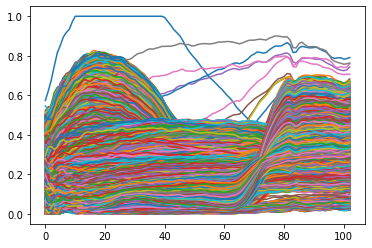

In [54]:
plt.plot(hsi_vec.T)
plt.show()